# London Airbnb Dataset EDA
___

### Importación de librerías

In [57]:
# Librerías de análisis de datos
import numpy as np
import pandas as pd

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración básica del dataset

Estas son las variables por entrada que contiene el dataset:
+ **id**: número de identificación de la publicación del alojamiento.
+ **name**: nombre de la publicación del alojamiento. 
+ **host_id**: número de identificación del anfitrión.
+ **host_name**: nombre del anfitrión.
+ **neighbourhood_group**: grupo de barrios.
+ **neighbourhood**:barrio o vecindario. 
+ **latitude**: latitud de la ubicación del alojamiento.
+ **longitude**:longitud de la ubicación del alojamiento.
+ **room_type**: tipo de habitación.
+ **price**: precio.
+ **minimum_nights**: noches mínimas.
+ **number_of_reviews**: cuantas personas han revisado el anuncio.
+ **last_review**: última revisión de la publicación.
+ **reviews_per_month**: promedio de revisión por mes.
+ **calculated_host_listings_count**: recuento de host calculados por un propietario/a.
+ **availability_365**: disponibilidad en los 365 días. 

In [58]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./london_airbnb.csv"

# Importamos el dataset y comprobamos que está correcto
df = pd.read_csv(path_to_data)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


In [59]:
# Se muestran las últimas entradas.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
85063,38398365,Beautiful flat in Central London,24782379,Shabnam,NaN,Lambeth,51.48601,-0.12766,Entire home/apt,117,3,2,2019-11-04,2.0,1,59
85064,39869123,Elegant stylish modern house with amazing view!,21145791,Ingrid,NaN,Merton,51.40628,-0.23244,Private room,69,2,0,NaN,NaN,2,113
85065,39869214,Holland Road - Kensington Olympia,251922260,Christian,NaN,Hammersmith and Fulham,51.50244,-0.21547,Entire home/apt,90,3,0,NaN,NaN,4,63
85066,39869249,Functional single room 18 min to London Bridge,255372486,Nudrat,NaN,Bromley,51.35742,0.10764,Private room,30,2,0,NaN,NaN,4,1
85067,39869282,"EXQUISITE APARTMENT, PEACEFUL ENVIRONMENT IN SOHO",210531062,Radi,NaN,Westminster,51.51090,-0.12480,Entire home/apt,187,1,0,NaN,NaN,1,311


In [60]:
#Cantidad de entradas y columnas. 
df.shape

(85068, 16)

Se observa: 
+ 16 columnas. 
+ 85068 entradas.

In [62]:
# Información sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  int64  
 1   name                            85043 non-null  object 
 2   host_id                         85068 non-null  int64  
 3   host_name                       85056 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   85068 non-null  object 
 6   latitude                        85068 non-null  float64
 7   longitude                       85068 non-null  float64
 8   room_type                       85068 non-null  object 
 9   price                           85068 non-null  int64  
 10  minimum_nights                  85068 non-null  int64  
 11  number_of_reviews               85068 non-null  int64  
 12  last_review                     

Se observa:
+ La columna "neighbourhood_group" se encuentra vacía por lo que no se considerará por falta de datos.
+ EL resto de columnas, en su mayoría, se encuentran completas. A excepción de las columnas: reviews_per_month, last_review, name y host_name.

In [63]:
#Conteo de datos faltantes por columna. 
df.isnull().sum(axis = 0)

id                                    0
name                                 25
host_id                               0
host_name                            12
neighbourhood_group               85068
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Se observa:
+ Las columnas con más datos faltantes son last_review y reviews_per_month, la cantidad es significativa. 

### Creación de nueva tabla
___

In [64]:
# Creando nueva tabla "df_londres" descartando columnas:
df_londres = df.drop(columns=["neighbourhood_group","id", "name","host_id","host_name"])
df_londres.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2,336
1,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2,365
2,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2,268
3,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1,158
4,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2,336


In [65]:
# Se comprueba la eliminación de columnas.
df_londres.shape

(85068, 11)

Se observa:
+ Se redujo de 16 a 11 columnas.

In [66]:
# Información de nueva tabla "df_londres":
df_londres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   85068 non-null  object 
 1   latitude                        85068 non-null  float64
 2   longitude                       85068 non-null  float64
 3   room_type                       85068 non-null  object 
 4   price                           85068 non-null  int64  
 5   minimum_nights                  85068 non-null  int64  
 6   number_of_reviews               85068 non-null  int64  
 7   last_review                     65062 non-null  object 
 8   reviews_per_month               65062 non-null  float64
 9   calculated_host_listings_count  85068 non-null  int64  
 10  availability_365                85068 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 7.1+ MB


In [67]:
# Datos faltantes en porcentaje ordenado de mayor a menor.
df_londres.isnull().mean().sort_values(ascending = False)

last_review                       0.235177
reviews_per_month                 0.235177
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

Se observa:
+ Falta de datos en las columnas last_review y reviews_per_month. Mismo porcentaje= 23.5177%.

In [68]:
# Identificación de variables:
categoricas = ["neighbourhood", "room_type", "last_review"]
numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

### Hipótesis y gráficas

Objetivo: análisis de datos y predicción para alquileres de pisos y habitaciones con fines vacacionales. 
___

+ De acuerdo al "neighbourhood" y al "type_room" varía el precio de los alojamientos. 
+ De acuerdo al "number_of_reviews" y "reviews_per_month" se determina los sitios más visitados/solicitados.
+ De acuerdo a la longitud y latitud se puede determinar la ubicación de los alojamientos y el clima (N/S).
+ De acuerdo a la "availability_365" y al "price" se puede determinar la exclusividad del alojamiento. 
+ De acuerdo a las últimas revisiones y el precio se puede determinar las temporadas altas de alojamiento con su precio.

In [13]:
#sns.catplot(x ='price', hue ='availability_365', kind ='count', col ='neighbourhood', data = df_londres)

array([[<AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='price', ylabel='latitude'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='latitude'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='latitude'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='latitude'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='latitude'>,
        <AxesSubplot:xlabel='availability_365', ylabel='latitude'>],
       [<AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='price', ylabel='longitude'>,
        <AxesSubplot:xlabel='minimum_nights', ylabel='longitude'>,
        <AxesSubplot:xlabel='number_of_reviews', ylabel='longitude'>,
        <AxesSubplot:xlabel='reviews_per_month', ylabel='longitude'>,
        <AxesSubplot:xlabel='calculated_host_listings_count', ylabel='longitude

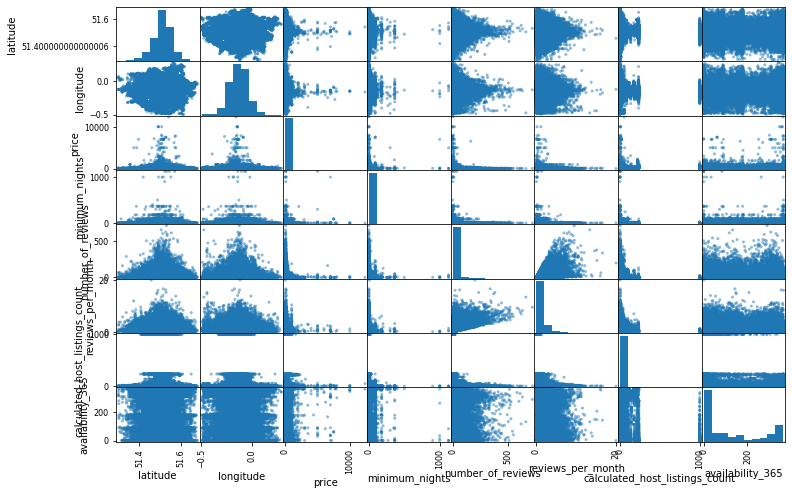

In [192]:
pd.plotting.scatter_matrix(df_londres[numericas], figsize=(12,8))

([<matplotlib.patches.Wedge at 0x1a8b36c31f0>,
 [Text(1.0317592625608707, 0.38140899847781323, ''),
  Text(0.5825252853319608, 0.93309393522245, ''),
  Text(0.023965907351831277, 1.0997388941402426, ''),
  Text(-0.46078948017158816, 0.9988358498588233, ''),
  Text(-0.8443177227776593, 0.7050727501496196, ''),
  Text(-1.0551379583199592, 0.3109403301477448, ''),
  Text(-1.096234991384006, -0.09093318242153914, ''),
  Text(-0.9939481339671876, -0.4712399675145837, ''),
  Text(-0.7821999433229437, -0.7734101425929091, ''),
  Text(-0.5058143212191248, -0.9768069780922105, ''),
  Text(-0.24836436182858768, -1.0715946732666595, ''),
  Text(-0.05319588523521146, -1.0987129733438312, ''),
  Text(0.12900674796831735, -1.092408924798145, ''),
  Text(0.2945376429615041, -1.0598337496412735, ''),
  Text(0.43642124259947634, -1.0097210005778474, ''),
  Text(0.559646244657278, -0.9469931788777606, ''),
  Text(0.6710064896410766, -0.8716365589278366, ''),
  Text(0.7657765229057992, -0.789674817229411

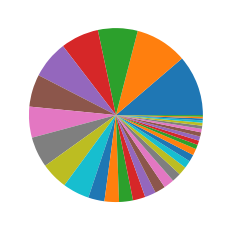

In [13]:
#Vecindarios más visitados
#plt.pie(df_londres["neighbourhood"].value_counts())

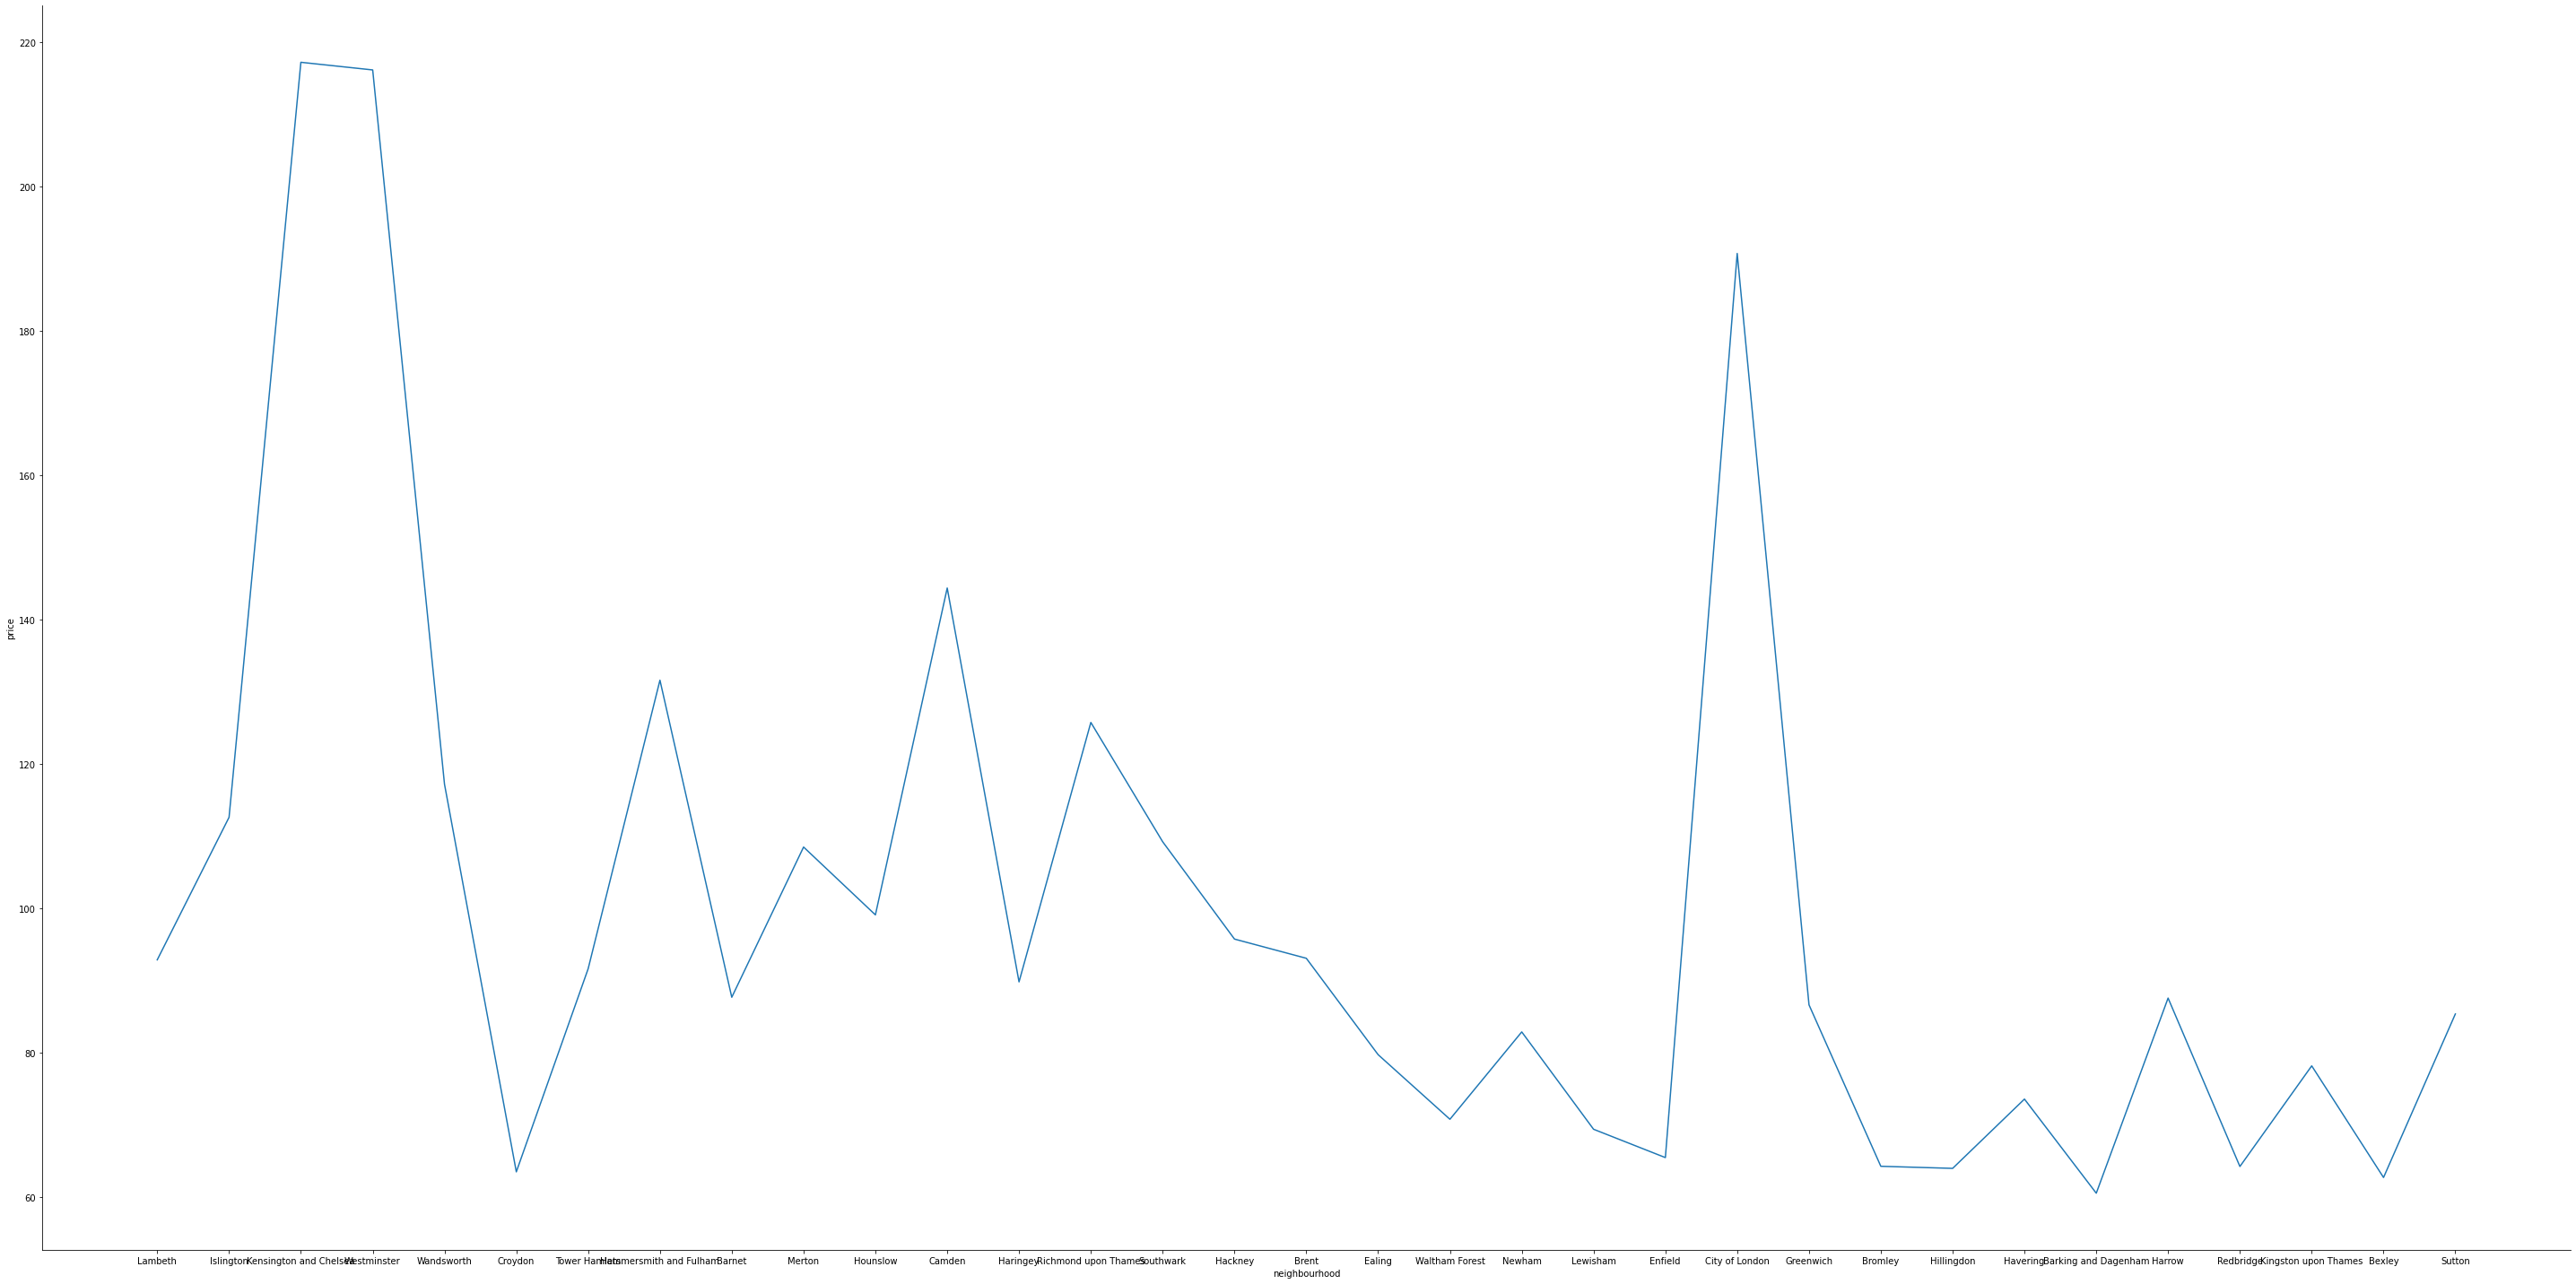

In [14]:
#De acuerdo al vecindario se estima el precio del alojamiento. 
sns.relplot(x="neighbourhood", y="price", ci=None, kind="line", data=df_londres, aspect=2, height=20)

Se observa:
+ Los alojamientos que se aproximan a los 220 por noche se encuentran en Lambeth,Islington, Kensington y Chelsea, Westminster y Wandsworth.
+ Los alojamientos que se aproximan a los 200 por noche se encuentran en Enfield, City of London y Greenwich.
+ En el resto de lugares el costo de alojamiento se encuentran en el rango de 60 a 160 por noche.

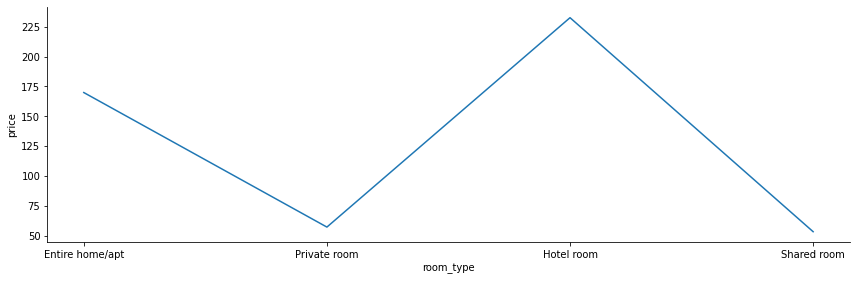

In [15]:
#De acuerdo al tipo de habitación se estima el precio del alojamiento. 
sns.relplot(x="room_type", y="price", ci=None, kind="line", data=df_londres, aspect=3, height=4)

Se observa:
+ Las habitaciones de hotel son de mayor costo y le sigue los alquileres de casa o apartamento.
+ Mientras las habitaciones compartidas o privadas son de menor costo. 

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

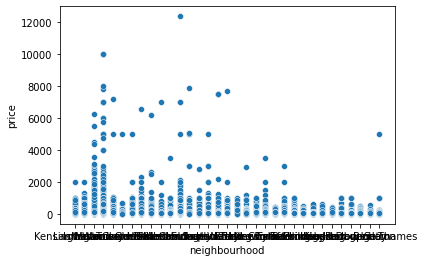

In [16]:
sns.scatterplot(data=df_londres, x="neighbourhood", y="price")

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>],
       [<AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:>]], dtype=object)

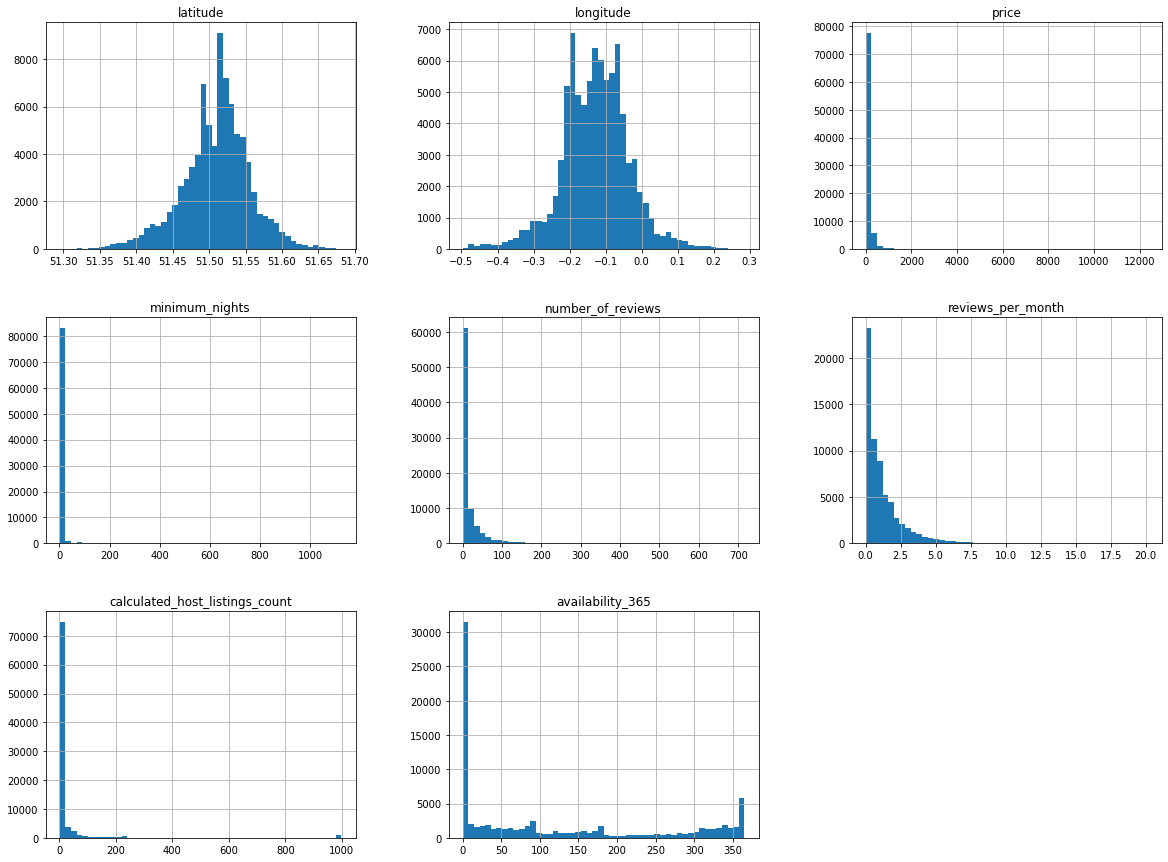

In [17]:
df[numericas].hist(bins=50, figsize=(20,15))

In [19]:
#sns.catplot(x ='price', hue ='room_type', kind ='count', col ='neighbourhood', data = df)

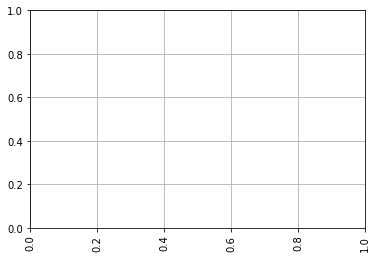

In [70]:
sns.catplot(x="number_of_reviews", y="price", data=df_londres, kind="bar", aspect=3, height=6)
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.grid(axis='y')
plt.show()

In [ ]:
sns.catplot(x="availability_365", y="price", data=df_londres, kind="bar", aspect=3, height=6)
plt.xticks(rotation=90)
plt.grid(axis='x')
plt.grid(axis='y')
plt.show()

In [ ]:
#sns.scatterplot(data=df_londres, x="latitude", y="longitude", hue="neighbourhood")

## INGENIERIA DE CARACTERISTICAS

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  int64  
 1   name                            85043 non-null  object 
 2   host_id                         85068 non-null  int64  
 3   host_name                       85056 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   85068 non-null  object 
 6   latitude                        85068 non-null  float64
 7   longitude                       85068 non-null  float64
 8   room_type                       85068 non-null  object 
 9   price                           85068 non-null  int64  
 10  minimum_nights                  85068 non-null  int64  
 11  number_of_reviews               85068 non-null  int64  
 12  last_review                     

In [72]:
#datos sin columnas que no se usaran
df_londres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   85068 non-null  object 
 1   latitude                        85068 non-null  float64
 2   longitude                       85068 non-null  float64
 3   room_type                       85068 non-null  object 
 4   price                           85068 non-null  int64  
 5   minimum_nights                  85068 non-null  int64  
 6   number_of_reviews               85068 non-null  int64  
 7   last_review                     65062 non-null  object 
 8   reviews_per_month               65062 non-null  float64
 9   calculated_host_listings_count  85068 non-null  int64  
 10  availability_365                85068 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 7.1+ MB


In [73]:
# Miramos los valores que están tomando las variables categóricas
for col in ["neighbourhood", "room_type"]:
    print(f"Valores en '{col}':")
    for i in df_londres[col].unique():
        print("\t"+str(i))
    print()

Valores en 'neighbourhood':
	Lambeth
	Islington
	Kensington and Chelsea
	Westminster
	Wandsworth
	Croydon
	Tower Hamlets
	Hammersmith and Fulham
	Barnet
	Merton
	Hounslow
	Camden
	Haringey
	Richmond upon Thames
	Southwark
	Hackney
	Brent
	Ealing
	Waltham Forest
	Newham
	Lewisham
	Enfield
	City of London
	Greenwich
	Bromley
	Hillingdon
	Havering
	Barking and Dagenham
	Harrow
	Redbridge
	Kingston upon Thames
	Bexley
	Sutton

Valores en 'room_type':
	Entire home/apt
	Private room
	Hotel room
	Shared room



In [74]:
# Ahora buscamos los NaN como tal
df_londres.isnull().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [75]:
# Comprobamos el porcentaje de valores perdidos para cada caso
lost_review = df_londres["last_review"].isnull().sum() / len(df["last_review"])
print(f"Porcentaje de valores perdidos en last_review: {round(lost_review, 2)*100}%")
lost_month = df_londres["reviews_per_month"].isnull().sum() / len(df["reviews_per_month"])
print(f"Porcentaje de valores perdidos en last_month: {round(lost_month, 2)*100}%")

Porcentaje de valores perdidos en last_review: 24.0%
Porcentaje de valores perdidos en last_month: 24.0%


In [200]:
#sns.histplot(data=df_londres, x="last_review", kde=True)

Se usa la moda ya que para fechas es el valor mas acertado para imputar estos datos

In [76]:
#moda
mode_review = df_londres["last_review"].mode()[0] # Especificar el 0 es importante, si no, el resultado es un Series
print(mode_review)

2019-11-03


In [77]:
#Imputación de datos por la moda
df_londres["last_review"].fillna(mode_review, inplace=True)
df_londres.isnull().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:xlabel='last_review', ylabel='Count'>

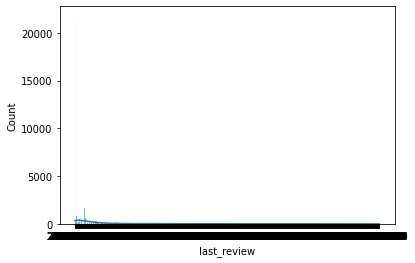

In [78]:
# Si imputara usando la mode, vemos que la distribución varía demasiado
sns.histplot(data=df_londres["last_review"].fillna(df_londres["last_review"].mode()), kde=True)

In [205]:
#sns.histplot(data=df_londres, x="price", kde=True)

In [79]:
#calculo el promedio de review per month
promedio = df_londres["reviews_per_month"].mean()
moda = df_londres["reviews_per_month"].mode()[0]
print(promedio, moda)


1.2019954812332851 1.0


In [207]:
#METODO KNN 
#from sklearn.impute import KNNImputer

# Construimos el modelo
#imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
#imputer.fit(df[["normalized-losses"]])
#df["normalized-losses"] = imputer.transform(df[["normalized-losses"]]).ravel()

#print("Valores perdidos en normalized-losses: " + 
      #str(df['normalized-losses'].isnull().sum()))

In [80]:
#imputacion de datos por el promedio
df_londres["reviews_per_month"].fillna(promedio, inplace=True)
df_londres.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [209]:
##sns.histplot(data=df_londres, x="reviews_per_month", kde=True)

In [210]:
#Grafica antes de fillna 
#df["reviews_per_month"].hist(bins=50, figsize=(20,15))

In [211]:
#grafica conmpleta 
##df_londres["reviews_per_month"].hist(bins=50, figsize=(20,15))

In [212]:
##df_londres["last_review"].hist(bins=50, figsize=(20,15))

In [213]:
# Distribución antes de imputar
##sns.histplot(data=df, x="reviews_per_month", kde=True)

Encontrar valores de cero en la columna de price, asi podemos ver si existen datos perdidos, ya que no pueden haber habitaciones en 0.

In [84]:
# Analizando valores en 0
df4 = df_londres [df_londres["price"] == 0] 
df4.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21308,Hackney,51.53964,-0.05461,Private room,0,2,30,2019-08-08,1.520000,2,0
28705,Waltham Forest,51.57500,-0.03317,Private room,0,2,77,2019-11-01,2.550000,1,31
29368,Camden,51.54414,-0.16598,Private room,0,1,0,2019-11-03,1.201995,1,0
31417,Tower Hamlets,51.53171,-0.05539,Private room,0,3,0,2019-11-03,1.201995,1,358
33747,Westminster,51.51647,-0.13315,Private room,0,1,11,2018-03-25,0.410000,2,0


<AxesSubplot:xlabel='reviews_per_month', ylabel='Count'>

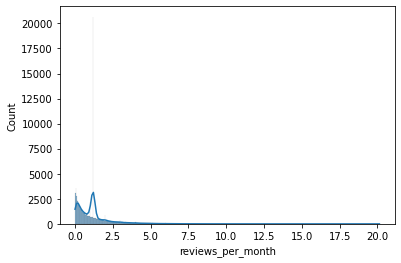

In [82]:
# Distribución antes de imputar
sns.histplot(data=df_londres, x="reviews_per_month", kde=True)

In [86]:
for i in range(len(df_londres['price'])):

    if 0 == df_londres['price'][i]:
        print(df_londres['price'][i])
        

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


Existen solo 18 registros en cero, con esto se pueden sacar dos conclusiones:
    Para una data de mas de 8000 datos, 18 no afectan el comportamiento del posible modelo
    Imputar datos para tener una data completa sin valores anomalos como lo es un 0 en el price

In [85]:
#calculo el promedio de precio
promedioprice = df_londres["price"].mean()
modaprice = df_londres["price"].mode()[0]
print(promedioprice, modaprice)

122.33676588141252 50


In [97]:
#encontrar los valores que se repiten
print(df_londres["price"].value_counts(ascending = True))

4         1
615       1
552       1
587       1
728       1
       ... 
120    2393
35     2450
40     2750
100    3066
50     3134
Name: price, Length: 880, dtype: int64


In [88]:
#print(df_londres.fillna(value=modaprice))
print(df4["price"])

21308    0
28705    0
29368    0
31417    0
33747    0
33834    0
34256    0
34330    0
34349    0
34367    0
34403    0
34604    0
34678    0
35845    0
35865    0
36091    0
36395    0
36452    0
Name: price, dtype: int64


In [89]:
df_londres['price'] = df_londres['price'].replace([0], modaprice)
#df['name'] = df['name'].str.replace('a','X')

In [93]:
for i in range(len(df_londres['price'])):

    if 0 == df_londres['price'][i]:
        print(df_londres['price'][i])
        

Hipotesis: influye cuantas reviews tiene el host, con respecto a los comemtarios y al precio?

los ceros de price afectan en algo a mi dataset ?

los ceros en disponibilidad al año representan algo ?

In [103]:
# Analizando valores en 0
df5 = df_londres [df_londres["availability_365"] == 0] 
df5.head(100)

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,Lambeth,51.46441,-0.12669,Private room,54,2,41,2018-01-30,0.560000,1,0
39,Hackney,51.55397,-0.03340,Private room,120,2,0,2019-11-03,1.201995,1,0
42,Westminster,51.51662,-0.17332,Entire home/apt,94,7,16,2019-10-07,0.160000,1,0
46,Waltham Forest,51.55842,0.00382,Private room,35,2,2,2011-07-02,0.020000,1,0
53,Hammersmith and Fulham,51.50803,-0.21599,Private room,125,1,0,2019-11-03,1.201995,1,0
...,...,...,...,...,...,...,...,...,...,...,...
562,Redbridge,51.56075,0.04069,Private room,200,14,0,2019-11-03,1.201995,1,0
564,Islington,51.54314,-0.08991,Private room,120,1,0,2019-11-03,1.201995,1,0
565,Kensington and Chelsea,51.49273,-0.19404,Entire home/apt,200,7,0,2019-11-03,1.201995,1,0
566,Camden,51.53918,-0.14702,Private room,99,2,262,2019-10-27,2.840000,1,0
